# Filtro Prewitt
#Daniel Anderson de Souza Leite

#Engenharia de Telecomunicações - IFCE

#Sistemas Multimidea

#Prof. Dr. Pedrosa

# Bibliotecas 

In [4]:
import cv2 #OpenCV
import numpy as np #biblioteca para trabalhar com arrays de maneira eficiente
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
from copy import copy
import math

# Leitura

In [5]:
img = cv2.imread('C:/Users/danie/Desktop/Scripsts Python/figs/ruido.png', cv2.IMREAD_GRAYSCALE)

#Mostra o tamanho da imagem
print("Tamanho da imagem")
np.shape(img)

Tamanho da imagem


(229, 280)

# Imagem com borda de preenchimento espelhado otimizada para filtro vizinhaça-8

In [6]:
#Recebe uma matriz e acrecenta bordas espelhadas
def preencher(imagem):
    #Recebe o tamanho da imagem e coloca nas variáveis m e n para uso posterior
    (m,n)=np.shape(imagem)

    # m número de linhas, n número de colunas. Soma de mais duas linhas(cime e baixo) e de duas colunas(esquerda e direita) para apliar a matrir devido ao preenchimento de borrda de vizinhaça-8.
    m=m+2
    n=n+2  

    #Cria uma matriz de zeros ampliada de duas linhas e duas colunas a mais. São as arestas acrescentadas devido ao kernel.
    imgpre=np.zeros((m,n), dtype=np.uint8)
    

    #Clone da imagem original para a imagem apliada com espelho das arestas e vértices (Preenchimento)

    #Arestas
    #Parte superior
    for p in range(0, n-2):
        imgpre[0][p+1] = imagem[0][p]
    #Parte inferior
    for q in range(0, n-2):
        imgpre[m-1][q+1] = imagem[m-3][q]
    #Parte esquerda
    for r in range(0, m-2):
        imgpre[r+1][0] = imagem[r][0]
    #Parte direita
    for s in range(0, m-2):
        imgpre[s+1][n-1] = imagem[s][n-3]

    #Vértices
    #Diagonal superior-esquerda
        imgpre[0][0] = imagem[0][0]
    #Diagonal Superior-direita
        imgpre[0][n-1] = imagem[0][n-3]
    #Diagonal Inferior-esquerda
        imgpre[m-1][0] = imagem[m-3][0]
    #Diagonal Inferior-direita
        imgpre[m-1][n-1] = imagem[m-3][n-3]

    #Face 
    for k in range(0,m-2):
        for l in range(0, n-2):
            imgpre[k+1][l+1] = imagem[k][l]
    return imgpre

# Imagem de saída

In [7]:
#Recebe o tamanho da imagem original
(c,d)=np.shape(img)

#Cria uma matriz de zeros do mesmo tamanho da img original
imgout=np.zeros((c,d), dtype=np.uint8)

prepross_hor=np.zeros((c,d), dtype=np.int16)
prepross_ver=np.zeros((c,d), dtype=np.int16)

#Tamanho da imagem de saída
np.shape(imgout)

(229, 280)

# Kernel vertical e horizontal vizinhaça-8

In [8]:
#Kernel vizinhaça-8 horizontal e vertical
kernel_hor = [[-1,-1,-1],[0,0,0],[1,1,1]]
kernel_ver = [[-1,0,1],[-1,0,1],[-1,0,1]]

temp_hor = copy(kernel_hor)
temp_ver = copy(kernel_ver)
imgmat=preencher(img) 

# Processamento Prewitt

In [9]:
def compor_prewitt(img_hor, img_ver):
    (c,d)=np.shape(img_hor)
    temp=np.zeros((c,d), dtype=np.int16)
    for x in range(c):
        for y in range(d):
            temp[x][y]= int(math.sqrt(((img_hor[x][y])**2)+((img_ver[x][y])**2)))
    temp=np.array(temp, dtype=np.uint8)
    return temp         

In [10]:
#Equaliza a imagem
def equalizer(imagem):
    imax=255
    minn=imagem.min()
    maxx=imagem.max()
    (c,d)=np.shape(imagem)
    temp=np.zeros((c,d), dtype=np.int16)
    img_saida=copy(imagem)
    
    #Equaliza a imagem
    for x in range(c):
        for y in range(d):
            temp[x][y] = ((img_saida[x][y]-minn)/(maxx-minn))*imax
    img_saida=np.array(temp, dtype=np.uint8)
    return img_saida   

In [11]:
#Realiza a convolução com o kernel horizontal e vertigal 
(t,v)=np.shape(imgmat)
#Varre a imagem
for x in range(1, t-1):
    for y in range(1, v-1):
        
        #Varre a interseção do kernel com a imagem
        for linha in range(3):
            for coluna in range(3):
                temp_hor[linha][coluna]*=imgmat[x-1+linha][y-1+coluna]
                temp_ver[linha][coluna]*=imgmat[x-1+linha][y-1+coluna]
                       
        #imgout recebe a soma do kernl temporário
        knlvector_hor = np.asarray(temp_hor).reshape(-1)#Trasforma matriz em vetor
        knlvector_ver = np.asarray(temp_ver).reshape(-1)#Trasforma matriz em vetor
        prepross_hor[x-1][y-1] = abs(sum(knlvector_hor))
        prepross_ver[x-1][y-1] = abs(sum(knlvector_ver))
        
        #reset do kernel temp
        temp_hor = [[-1,-1,-1],[0,0,0],[1,1,1]] 
        temp_ver = [[-1,0,1],[-1,0,1],[-1,0,1]]

#Compões o filtro prewit e equaliza a imagem        
imgout=compor_prewitt(prepross_hor, prepross_ver)
imgout=equalizer(imgout)

# Deslocamento e equalização das imagens pré-procesadas vetical e horizontal

In [12]:
#translada se negativo e equaliza eliminando os números negativos sem distorcer a imagem
def shiftequalizer(imagem):   
    imax=255
    minn=imagem.min()
    maxx=imagem.max()
    (c,d)=np.shape(imagem)
    temp=np.zeros((c,d), dtype=np.int16)
    img_saida=copy(imagem)

    if (minn < 0):
        #Varre a imagem
        for x in range(c):
            for y in range(d):
                temp[x][y] = imagem[x][y]+(minn*-1)
        img_saida=copy(temp)
        minn=img_saida.min()
        maxx=img_saida.max()
    
    if(maxx>255):
        #Varre a imagem
        for x in range(c):
            for y in range(d):
                temp[x][y] = imagem[x][y]-(minn)
        img_saida=copy(temp)
        minn=img_saida.min()
        maxx=img_saida.max()

    #Equaliza a imagem
    for x in range(c):
        for y in range(d):
            temp[x][y] = ((img_saida[x][y]-minn)/(maxx-minn))*imax
    img_saida=copy(temp)
    img_saida=np.array(img_saida, dtype=np.uint8)
    return img_saida  

# Exibi as componentes vertical e horizontal

C:\Users\danie\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


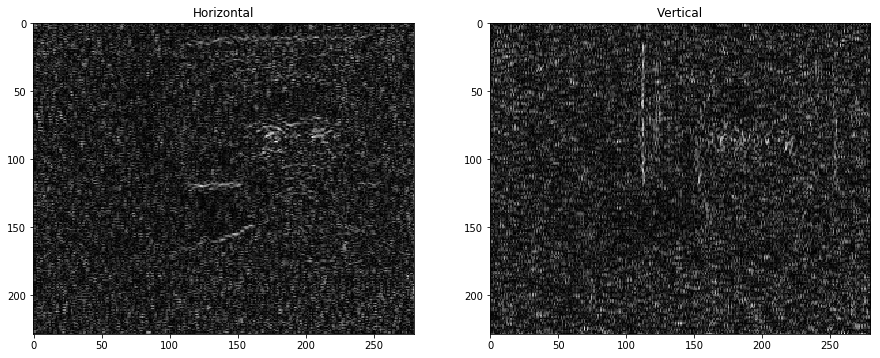

In [13]:
#Equaliza e processa as imagens vertical e horizontal e depois as exibe pela matplotlib
prepross_hor=shiftequalizer(prepross_hor)
prepross_ver=shiftequalizer(prepross_ver)
plt.figure(1, [15, 15])
plt.subplot(121), plt.imshow(prepross_hor, vmin=0, vmax=255, cmap='gray')
plt.subplot(121).set_title('Horizontal')
plt.subplot(122), plt.imshow(prepross_ver, vmin=0, vmax=255, cmap='gray')
plt.subplot(122).set_title('Vertical')

plt.show()

# Exibição Prewitt pela matplotlib

Text(0.5, 1.0, 'Prewitt')

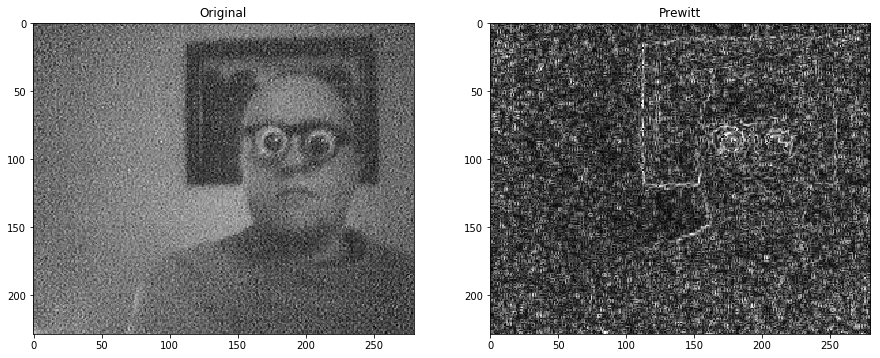

In [14]:
plt.figure(2, [15, 15])
plt.subplot(121), plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.subplot(121).set_title('Original')
plt.subplot(122), plt.imshow(imgout, vmin=0, vmax=255, cmap='gray')
plt.subplot(122).set_title('Prewitt')

# Exibição pela Open CV

In [342]:
# Exibe a imagem de saída pela opencv em uma janela
cv2.imshow("Prewitt", imgout)
cv2.waitKey(0)
#cv2.destroyAllWindows()


105

In [214]:
# Exibe a imagem de entrada pela opencv em uma janela
cv2.imshow("Imagem original", img)
cv2.waitKey(0)

-1

# Histograma

Histograma Prewitt:


<StemContainer object of 3 artists>

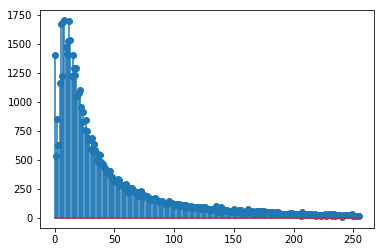

In [302]:
# Using opencv
# Mostra o histograma da imagem de saída
hist = cv2.calcHist([imgout], [0], None, [256], [0,256])
hist = hist.reshape((hist.shape[0],))
print("Histograma Prewitt:")
plt.stem(hist)

Histogram Imagem Original:


<StemContainer object of 3 artists>

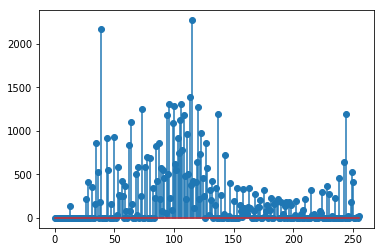

In [303]:
# Mostra o histograma da imagem original
hist = cv2.calcHist([img], [0], None, [256], [0,256])
hist = hist.reshape((hist.shape[0],))
print("Histogram Imagem Original:")
plt.stem(hist)

# Savar a imagem processada

In [ ]:

cv2.imwrite('C:/Users/danie/Desktop/Scripsts Python/figs/Arquivos processados/prewitt.png', imgout)